<a href="https://colab.research.google.com/github/simulate111/mini-project-2-Abo/blob/main/mini_project_2-Samiur_Rahman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM Accuracy: 0.78059375
              precision    recall  f1-score   support

           0       0.79      0.77      0.78     16002
           4       0.77      0.79      0.78     15998

    accuracy                           0.78     32000
   macro avg       0.78      0.78      0.78     32000
weighted avg       0.78      0.78      0.78     32000



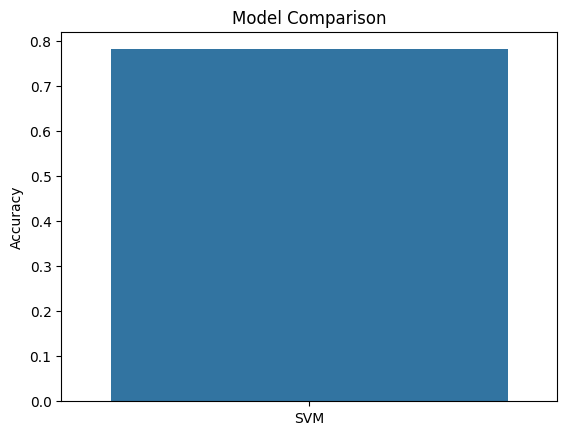

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC # Importing Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'https://raw.githubusercontent.com/simulate111/mini-project-2-Abo/main/Sentiment140.tenPercent.sample.tweets.tsv'
data = pd.read_csv(data_path, delimiter='\t', encoding='utf-8')
data.columns = ['sentiment', 'text'] # Adjusting column names based on your dataset

# Preprocess the data as needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42) # Using linear kernel
svm_model.fit(X_train_tfidf, y_train)

# Evaluate SVM model
svm_predictions = svm_model.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

# Visualize the Performance
accuracies = [accuracy_score(y_test, svm_predictions)]
model_names = ['SVM']

sns.barplot(x=model_names, y=accuracies)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.show()


MLP Accuracy: 0.76046875
              precision    recall  f1-score   support

           0       0.76      0.77      0.76     16002
           4       0.76      0.76      0.76     15998

    accuracy                           0.76     32000
   macro avg       0.76      0.76      0.76     32000
weighted avg       0.76      0.76      0.76     32000



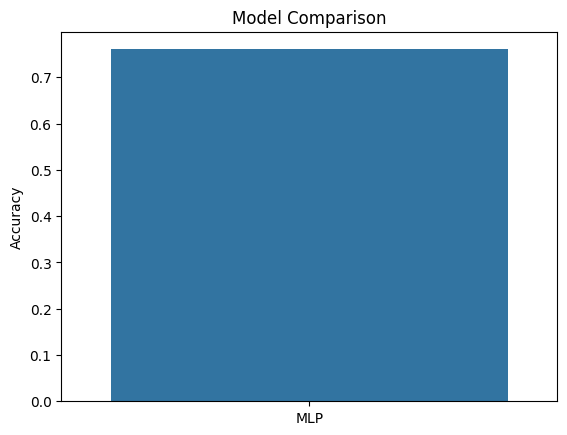

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'https://raw.githubusercontent.com/simulate111/mini-project-2-Abo/main/Sentiment140.tenPercent.sample.tweets.tsv'
data = pd.read_csv(data_path, delimiter='\t', encoding='utf-8')
data.columns = ['sentiment', 'text']  # Adjust column names as needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model: Multi-Layer Perceptron (Neural Network)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)  # You can adjust parameters as needed
mlp_model.fit(X_train_tfidf, y_train)

# Evaluate MLP model
mlp_predictions = mlp_model.predict(X_test_tfidf)
print("MLP Accuracy:", accuracy_score(y_test, mlp_predictions))
print(classification_report(y_test, mlp_predictions))

# Visualize the Performance
accuracies = [accuracy_score(y_test, mlp_predictions)]
model_names = ['MLP']

sns.barplot(x=model_names, y=accuracies)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.show()
